# How to Train YOLOv5 on Custom Objects

This tutorial is based on the [YOLOv5 repository](https://github.com/ultralytics/yolov5) by [Ultralytics](https://www.ultralytics.com/). This notebook shows training on **your own custom objects**. Many thanks to Ultralytics for putting this repository together - we hope that in combination with clean data management tools at Roboflow, this technologoy will become easily accessible to any developer wishing to use computer vision in their projects.

### Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on [how to train YOLOv5](https://blog.roboflow.ai/how-to-train-yolov5-on-a-custom-dataset/), concurrently.

### Steps Covered in this Tutorial

In this tutorial, we will walk through the steps required to train YOLOv5 on your custom objects. We use a [public blood cell detection dataset](https://public.roboflow.ai/object-detection/bccd), which is open source and free to use. You can also use this notebook on your own data.

To train our detector we take the following steps:

* Install YOLOv5 dependencies
* Download custom YOLOv5 object detection data
* Write our YOLOv5 Training configuration
* Run YOLOv5 training
* Evaluate YOLOv5 performance
* Visualize YOLOv5 training data
* Run YOLOv5 inference on test images
* Export saved YOLOv5 weights for future inference



### **About**

[Roboflow](https://roboflow.ai) enables teams to deploy custom computer vision models quickly and accurately. Convert data from to annotation format, assess dataset health, preprocess, augment, and more. It's free for your first 1000 source images.

#### ![Roboflow Workmark](https://i.imgur.com/WHFqYSJ.png)


#Install Dependencies

_(Remember to choose GPU in Runtime if not already selected. Runtime --> Change Runtime Type --> Hardware accelerator --> GPU)_

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -r yolov5/requirements.txt  # install dependencies
%cd yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-un31sibw
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-un31sibw
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-linux_x86_64.whl size=266459 sha256=a2bc298f5467372eb106e66f05e6553ad1f4866f6cf73934cc77696144abfd3f
  Stored in directory: /tmp/pip-ephem-wheel-cache-7xm3t6qc/wheels/90/51/41/646daf401c3bc408ff10de34ec76587a9b3ebfac8d21ca5c3a
Successfully built pycocotools
/content/yolov5


In [ ]:
import torch
from IPython.display import Image  # to display images   clear_output
from utils.google_utils import gdrive_download  # to download models/datasets
import yaml

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.5.1+cu101 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


# Download Correctly Formatted Custom Dataset 

We'll download our dataset from Roboflow. Use the "**YOLOv5 PyTorch**" export format. Note that the Ultralytics implementation calls for a YAML file defining where your training and test data is. The Roboflow export also writes this format for us.

To get your data into Roboflow, follow the [Getting Started Guide](https://blog.roboflow.ai/getting-started-with-roboflow/).

In [ ]:
# Export code snippet and paste here
# %cd /content
# !curl -L "https://public.roboflow.ai/ds/YOUR DATASET HERE" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip


In [ ]:
%cd /content/yolov5

/content/yolov5


In [ ]:
# !rm -rf inference1.zip
# unzip
!tar -xvf part3_vertical_270_part2.tgz
# !tar -xvf data-validation-hong.tgz

Streaming output truncated to the last 5000 lines.
infer3_vertical_270_part2/39.68680628--104.92443999999999-270.jpg
infer3_vertical_270_part2/39.68681033--104.921052-270.jpg
infer3_vertical_270_part2/39.68681465--104.975775-270.jpg
infer3_vertical_270_part2/39.68681938--104.9316912-270.jpg
infer3_vertical_270_part2/39.68683024--105.047983-270.jpg
infer3_vertical_270_part2/39.68683597--104.96850549999999-270.jpg
infer3_vertical_270_part2/39.68684078--104.968727-270.jpg
infer3_vertical_270_part2/39.68684545--105.04896880000001-270.jpg
infer3_vertical_270_part2/39.68685164--104.9581467-270.jpg
infer3_vertical_270_part2/39.6868821--104.9293393-270.jpg
infer3_vertical_270_part2/39.68689586--104.969898-270.jpg
infer3_vertical_270_part2/39.68689951--104.91405929999999-270.jpg
infer3_vertical_270_part2/39.68690291--104.96748490000002-270.jpg
infer3_vertical_270_part2/39.68690469--105.01317970000001-270.jpg
infer3_vertical_270_part2/39.68690585--104.978108-270.jpg
infer3_vertical_270_part2/39.

In [ ]:
data = {"train": "data-batch2/images", 
        "val": "data-batch2/images",
        "nc": 5,
        "names": ["lamp","sign-h","fh","nopark","stop"]}
%cd /content/
with open("data.yaml", "w") as fname:
  yaml.dump(data, fname)



/content


In [ ]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat data.yaml

names:
- lamp
- sign-h
- fh
- nopark
- stop
nc: 5
train: data-batch2/images
val: data-batch2/images


# Define Model Configuration and Architecture

We will write a yaml script that defines the parameters for our model like the number of classes, anchors, and each layer.

You do not need to edit these cells, but you may.

In [ ]:
# define number of classes based on YAML
import yaml
with open("data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
%cd /content/
##write custom model .yaml
#you can configure this based on other YOLOv5 models in the models directory
with open('yolov5/models/custom_yolov5s.yaml', 'w') as f:
  # parameters
  f.write('nc: ' + num_classes + '\n')
  #f.write('nc: ' + str(len(class_labels)) + '\n')
  f.write('depth_multiple: 0.33'  + '\n') # model depth multiple
  f.write('width_multiple: 0.50'  + '\n')  # layer channel multiple
  f.write('\n')
  f.write('anchors:' + '\n')
  f.write('  - [10,13, 16,30, 33,23] ' + '\n')
  f.write('  - [30,61, 62,45, 59,119]' + '\n')
  f.write('  - [116,90, 156,198, 373,326] ' + '\n')
  f.write('\n')

  f.write('backbone:' + '\n')
  f.write('  [[-1, 1, Focus, [64, 3]],' + '\n')
  f.write('   [-1, 1, Conv, [128, 3, 2]],' + '\n')
  f.write('   [-1, 3, Bottleneck, [128]],' + '\n')
  f.write('   [-1, 1, Conv, [256, 3, 2]],' + '\n')
  f.write('   [-1, 9, BottleneckCSP, [256]],' + '\n')
  f.write('   [-1, 1, Conv, [512, 3, 2]], ' + '\n')
  f.write('   [-1, 9, BottleneckCSP, [512]],' + '\n')
  f.write('   [-1, 1, Conv, [1024, 3, 2]],' + '\n')
  f.write('   [-1, 1, SPP, [1024, [5, 9, 13]]],' + '\n')
  f.write('   [-1, 6, BottleneckCSP, [1024]],' + '\n')
  f.write('  ]' + '\n')
  f.write('\n')

  f.write('head:'  + '\n')
  f.write('  [[-1, 3, BottleneckCSP, [1024, False]],'  + '\n')
  f.write('   [-1, 1, nn.Conv2d, [na * (nc + 5), 1, 1, 0]],' + '\n')
  f.write('   [-2, 1, nn.Upsample, [None, 2, "nearest"]],' + '\n')
  
  f.write('   [[-1, 6], 1, Concat, [1]],' + '\n')
  f.write('   [-1, 1, Conv, [512, 1, 1]],' + '\n')
  f.write('   [-1, 3, BottleneckCSP, [512, False]],' + '\n')
  f.write('   [-1, 1, nn.Conv2d, [na * (nc + 5), 1, 1, 0]],' + '\n')
  
  f.write('   [-2, 1, nn.Upsample, [None, 2, "nearest"]],' + '\n')
  f.write('   [[-1, 4], 1, Concat, [1]],' + '\n')
  f.write('   [-1, 1, Conv, [256, 1, 1]],' + '\n')
  f.write('   [-1, 3, BottleneckCSP, [256, False]],' + '\n')
  f.write('   [-1, 1, nn.Conv2d, [na * (nc + 5), 1, 1, 0]],' + '\n')
  f.write('\n' )
  f.write('   [[], 1, Detect, [nc, anchors]],' + '\n')
  f.write('  ]' + '\n')

print('custom model config written!')

/content
custom model config written!


# Train Custom YOLOv5 Detector

### Next, we'll fire off training!


Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** set the path to our yaml file
- **cfg:** specify our model configuration
- **weights:** specify a custom path to weights. (Note: you can download weights from the Ultralytics Google Drive [folder](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J))
- **name:** result names
- **nosave:** only save the final checkpoint
- **cache:** cache images for faster training

In [ ]:
# train yolov5s on custom data for 50 epochs
# time its performance
%%time
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 50 --data '../data.yaml' --cfg ./models/custom_yolov5s.yaml --weights ./weights/yolov5s.pt --name results --nosave --cache
# !python train.py --img 416 --batch 16 --epochs 130 --data '../data.yaml' --cfg ./models/custom_yolov5s.yaml --weights ./weights/last_validation_results.pt --name results_cont --cache

/content/yolov5
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
{'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.58, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.014, 'hsv_s': 0.68, 'hsv_v': 0.36, 'degrees': 0.0, 'translate': 0.0, 'scale': 0.5, 'shear': 0.0}
Namespace(adam=False, batch_size=16, bucket='', cache_images=True, cfg='./models/custom_yolov5s.yaml', data='../data.yaml', device='', epochs=50, evolve=False, img_size=[416], multi_scale=False, name='results', noautoanchor=False, nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='./weights/yolov5s.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P4', total_memory=7611MB)

2020-06-27 17:14:05.079562: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Start Tensorboard with "tensorboard --logdir=runs", view 

# Evaluate Custom YOLOv5 Detector Performance

Training losses and performance metrics are saved to Tensorboard and also to a logfile defined above with the **--name** flag when we train. In our case, we named this `yolov5s_results`. (If given no name, it defaults to `results.txt`.) The results file is plotted as a png after training completes.

Note from Glenn: Partially completed `results.txt` files can be plotted with `from utils.utils import plot_results; plot_results()`.

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


<IPython.core.display.Javascript object>

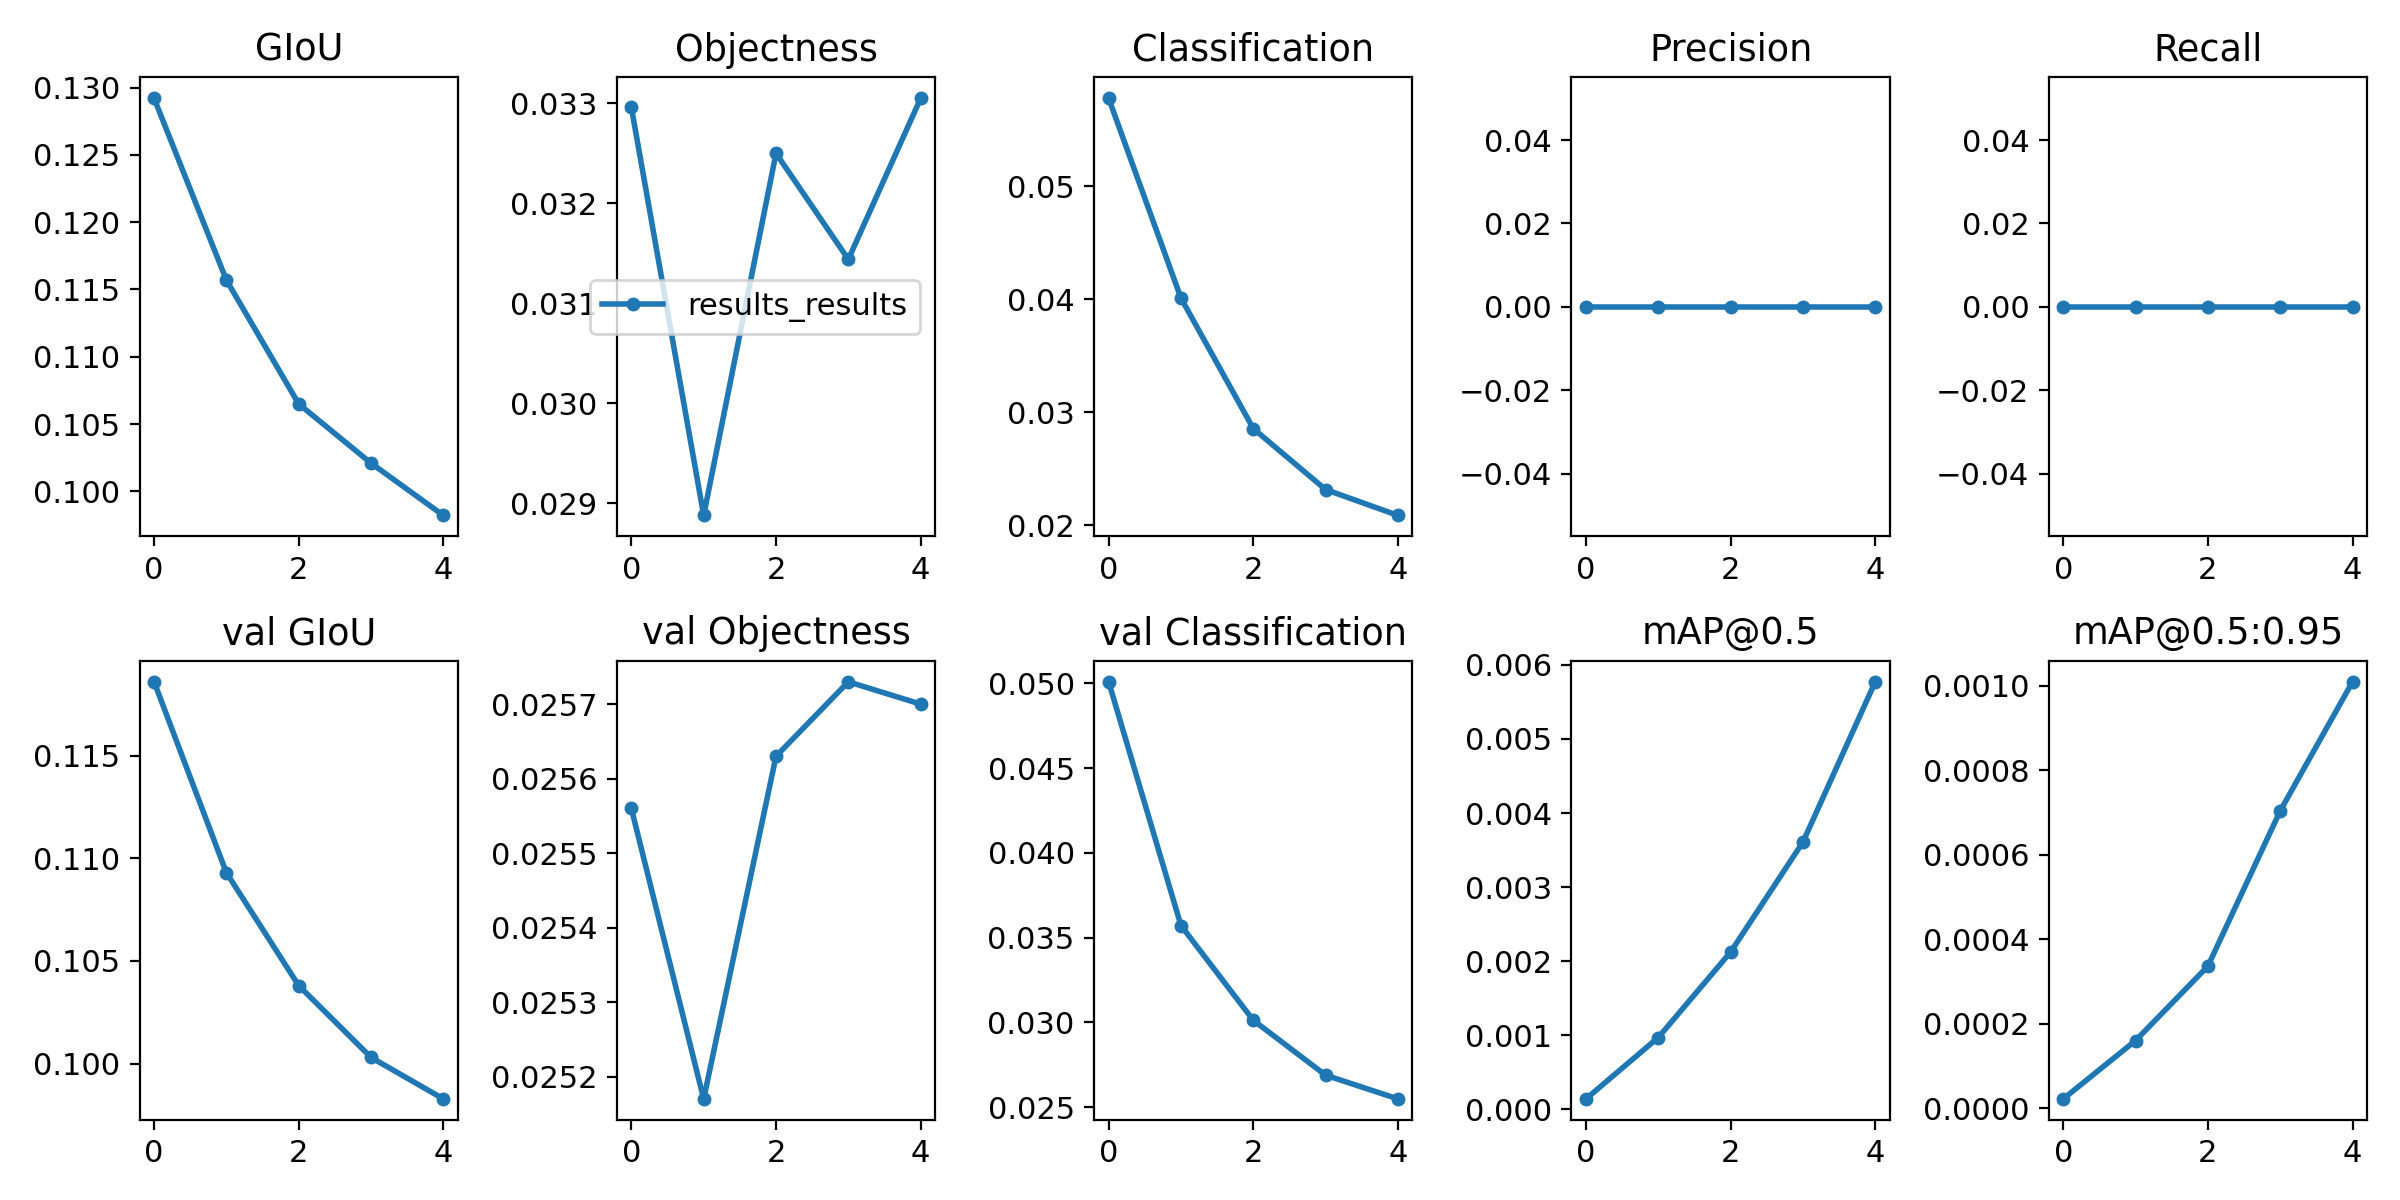

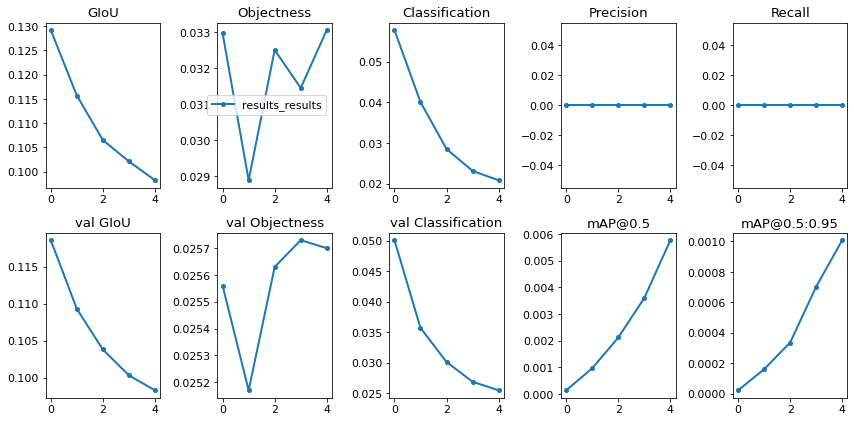

In [ ]:
# we can also output some older school graphs if the tensor board isn't working for whatever reason... 
from utils.utils import plot_results; plot_results()  # plot results.txt as results.png
Image(filename='./results.png', width=1000)  # view results.png

### Curious? Visualize Our Training Data with Labels

After training starts, view `train*.jpg` images to see training images, labels and augmentation effects.

Note a mosaic dataloader is used for training (shown below), a new dataloading concept developed by Glenn Jocher and first featured in [YOLOv4](https://arxiv.org/abs/2004.10934).

GROUND TRUTH TRAINING DATA:


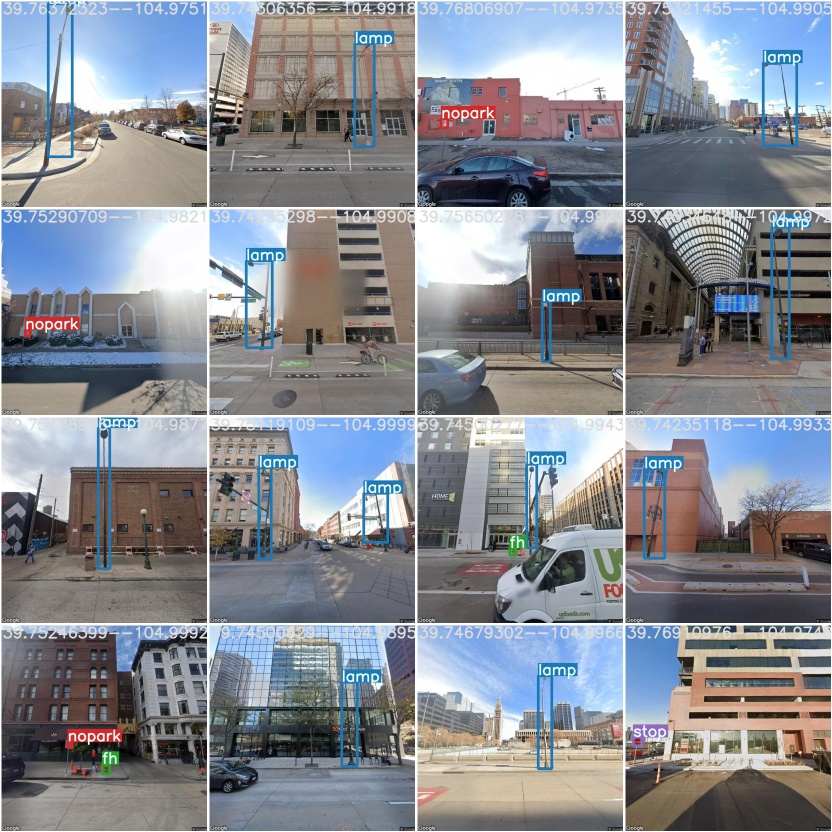

In [ ]:
# first, display our ground truth data
print("GROUND TRUTH TRAINING DATA:")
Image(filename='./test_batch0_gt.jpg', width=900)

In [ ]:
# print out an augmented training example
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='./train_batch2.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


NameError: ignored

#Run Inference  With Trained Weights
Run inference with a pretrained checkpoint on contents of `test/images` folder downloaded from Roboflow.

In [ ]:
# trained weights are saved by default in our weights folder
%ls weights/

download_weights.sh*  last_validation_results.pt


In [ ]:
!rm -rf /content/yolov5/inference/output

In [ ]:
import glob
import pandas as pd
import os

surfix = "_yolo"

dfs = []
os.chdir("/content/yolov5/inference/output")
for fname in glob.glob("*"+ surfix + ".txt"):
  df = pd.read_csv(fname, header = None, sep = "\s+")
  name = fname[:-9] + ".jpg"
  df["imgname"] = name
  dfs.append(df)
df = pd.concat(dfs)
splitname = df["imgname"].str[:-4].str.split("-+",expand=True)
df = pd.concat([df,splitname],axis=1)

if surfix == "_bbox":
  df.columns = ["className","class","confidence", "xmin", "ymin", "xmax", "ymax", "imgname","lat", "long","angle"]
  df["xmin"] = df["xmin"].astype(int)
  df["ymin"] = df["ymin"].astype(int)
  df[["imgname", "lat", "long","angle","class", "className","confidence","xmin", "ymin", "xmax", "ymax","lat", "long","angle"]].to_csv("output"+surfix+".csv", index = False)
else:
  df.columns = ["className","class","confidence", "xcenter", "ycenter", "width", "hight", "imgname","lat", "long","angle"]
  df[["imgname","lat", "long","angle","class", "className","confidence", "xcenter", "ycenter", "width", "hight"]].to_csv("output"+surfix+".csv", index = False)

In [ ]:
import shutil

handiImg = df[df["className"] == "sign-h"]["imgname"].unique()

exportPath = "/content/yolov5/inference/export"

if not os.path.exists(exportPath):
  os.mkdir(exportPath)

for img in handiImg:
  src = os.path.join("/content/yolov5/inference/output",img)
  dest = os.path.join(exportPath,img)
  shutil.copyfile(src,dest)

os.chdir(exportPath)
!tar -czvf outImg.tgz $exportPath

os.chdir("/content/yolov5/")

tar: Removing leading `/' from member names
/content/yolov5/inference/export/
/content/yolov5/inference/export/39.7292422--104.9284696-0.jpg
/content/yolov5/inference/export/39.730449--104.97590079999999-0.jpg
/content/yolov5/inference/export/39.73514395--104.95534640000001-0.jpg
/content/yolov5/inference/export/39.73682538--104.9668423-0.jpg
/content/yolov5/inference/export/39.73104852--104.9345699-0.jpg
/content/yolov5/inference/export/39.73687889--104.9793223-0.jpg
/content/yolov5/inference/export/outImg.tgz
tar: /content/yolov5/inference/export/outImg.tgz: file changed as we read it
/content/yolov5/inference/export/39.72688333--104.90807450000001-0.jpg
/content/yolov5/inference/export/39.72726751--104.9815415-0.jpg
/content/yolov5/inference/export/39.73285325--104.93994380000001-0.jpg
/content/yolov5/inference/export/39.73289234--104.90705590000002-0.jpg
/content/yolov5/inference/export/39.72923489--104.9316511-0.jpg


In [ ]:
import shutil

inferImg = df["imgname"].unique()

inferPath = "/content/yolov5/inference/infer"

if not os.path.exists(inferPath):
  os.mkdir(inferPath)

for img in inferImg:
  src = os.path.join("/content/yolov5/inference/output",img)
  dest = os.path.join(inferPath,img)
  shutil.copyfile(src,dest)

os.chdir(inferPath)
!tar -czvf outImg.tgz $inferPath
!rm -f *.jpg

os.chdir("/content/yolov5/")

tar: Removing leading `/' from member names
/content/yolov5/inference/infer/
/content/yolov5/inference/infer/39.71073221--104.9851963-270.jpg
/content/yolov5/inference/infer/39.7059366--104.9200142-270.jpg
/content/yolov5/inference/infer/39.72276857--104.96016399999999-270.jpg
/content/yolov5/inference/infer/39.71425581--104.9525518-270.jpg
/content/yolov5/inference/infer/39.71293287--104.98515259999998-270.jpg
/content/yolov5/inference/infer/39.71818791--104.9700909-270.jpg
/content/yolov5/inference/infer/39.68313909--104.9608192-270.jpg
/content/yolov5/inference/infer/39.66788179--105.0386846-270.jpg
/content/yolov5/inference/infer/39.67911422--104.99224170000001-270.jpg
/content/yolov5/inference/infer/39.68417814--104.9596744-270.jpg
/content/yolov5/inference/infer/39.67907607--105.0290903-270.jpg
/content/yolov5/inference/infer/39.71796598--104.92695810000001-270.jpg
/content/yolov5/inference/infer/39.6839878--104.94473640000001-270.jpg
/content/yolov5/inference/infer/39.68451157--

In [ ]:
!tar -czvf prediction.tgz /content/yolov5/inference/output/*

tar: Removing leading `/' from member names
tar: /content/yolov5/inference/output/*: Cannot stat: No such file or directory
tar: Exiting with failure status due to previous errors


In [ ]:

# Clean up blank images
import os
import glob

os.chdir("/content/yolov5/infer3_vertical_270_part2")
for fname in glob.glob("*.jpg"):
    if os.path.getsize(fname) < 15000:
        os.remove(fname)



In [ ]:
# when we ran this, we saw .007 second inference time. That is 140 FPS on a TESLA P100!
%cd /content/yolov5/
!python detect.py --weights weights/last_validation_results.pt --img 416 --conf 0.4 --source infer3_vertical_270_part2/

Streaming output truncated to the last 5000 lines.
416x416 1 lamps, 1 fhs, 1 stops, Done. (0.008s)
image 3548/7368 /content/yolov5/infer3_vertical_270_part2/39.69717853--104.9827993-270.jpg: inference/output/39.69717853--104.9827993-270_yolo.txt inference/output/39.69717853--104.9827993-270_bbox.txt
416x416 1 lamps, Done. (0.008s)
image 3549/7368 /content/yolov5/infer3_vertical_270_part2/39.69718171--104.96404679999999-270.jpg: 416x416 Done. (0.011s)
image 3550/7368 /content/yolov5/infer3_vertical_270_part2/39.69718447--104.9051288-270.jpg: 416x416 Done. (0.007s)
image 3551/7368 /content/yolov5/infer3_vertical_270_part2/39.69720331--104.91410400000001-270.jpg: 416x416 Done. (0.007s)
image 3552/7368 /content/yolov5/infer3_vertical_270_part2/39.69720751--105.03905-270.jpg: 416x416 Done. (0.008s)
image 3553/7368 /content/yolov5/infer3_vertical_270_part2/39.69721617--104.97691100000002-270.jpg: 416x416 Done. (0.010s)
image 3554/7368 /content/yolov5/infer3_vertical_270_part2/39.69722111--10

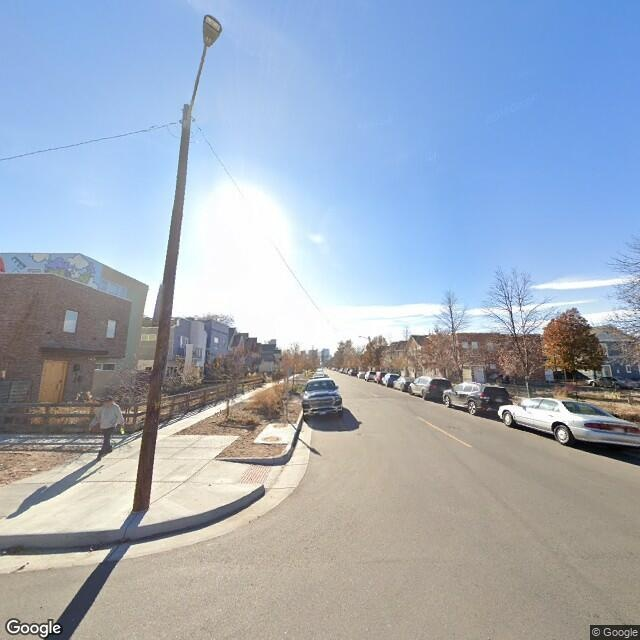

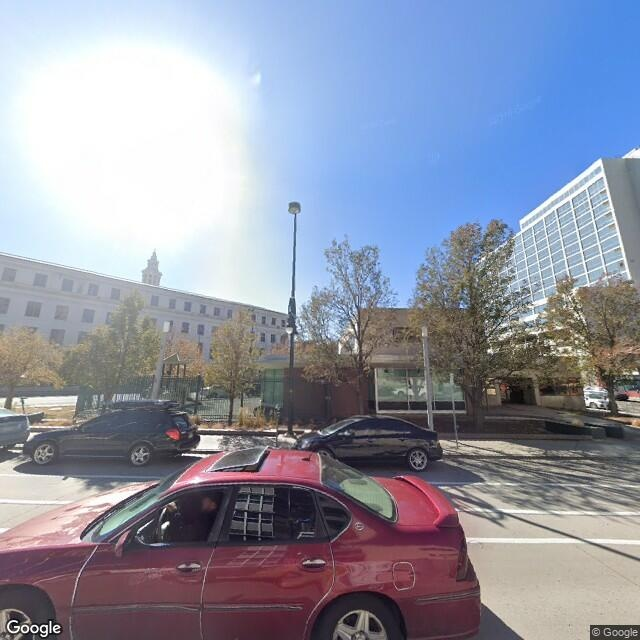

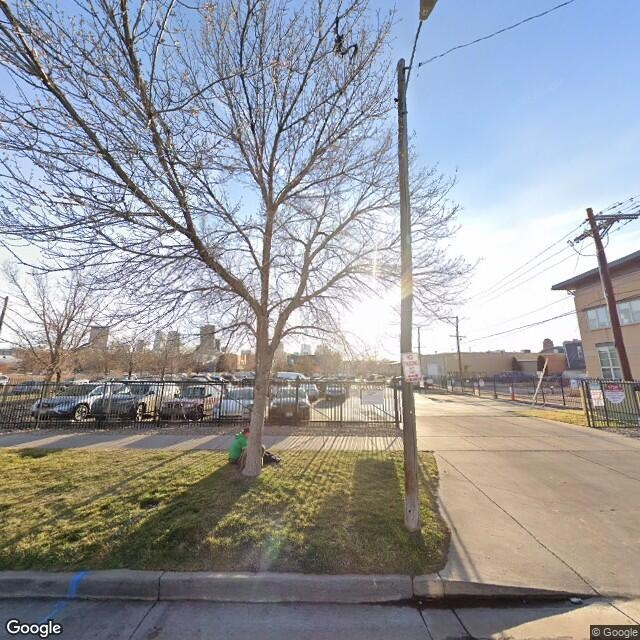

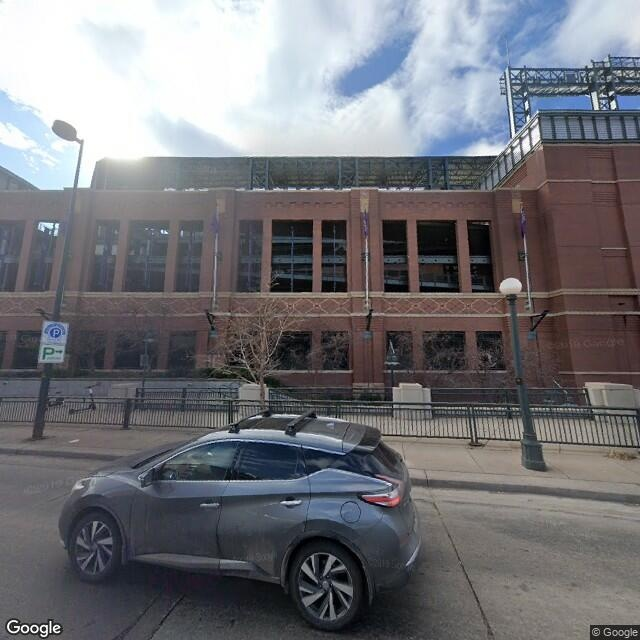

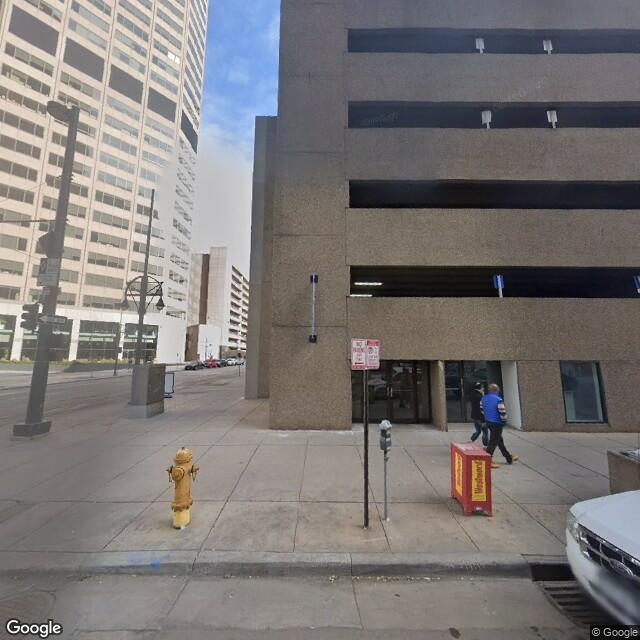

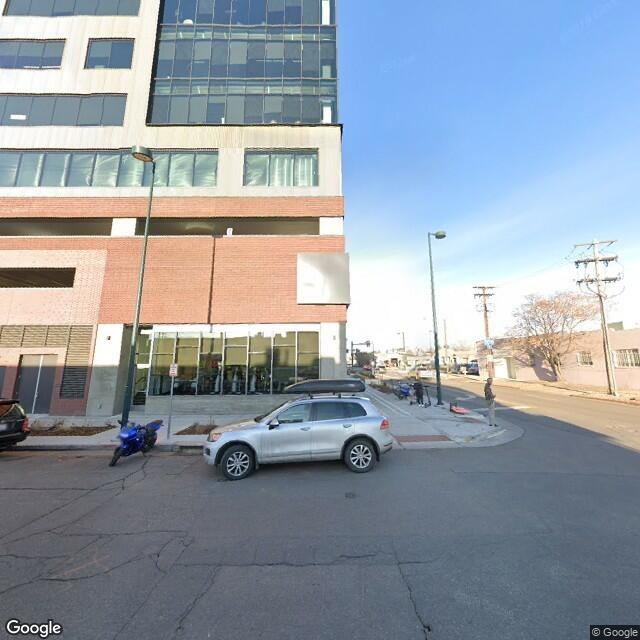

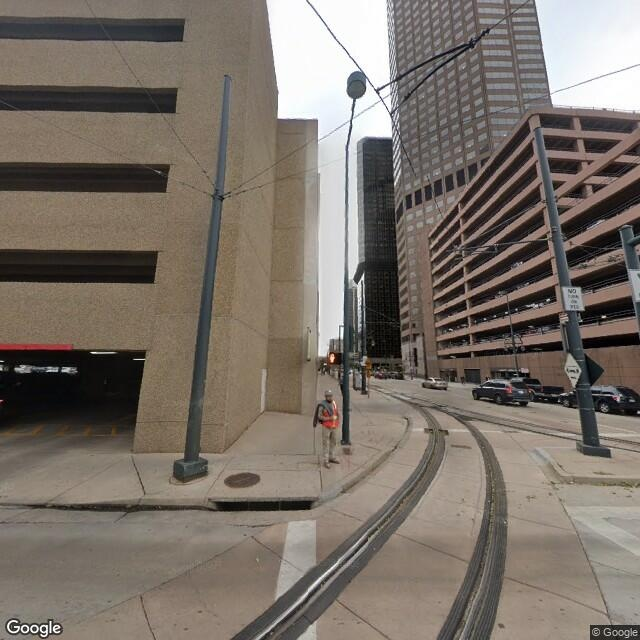

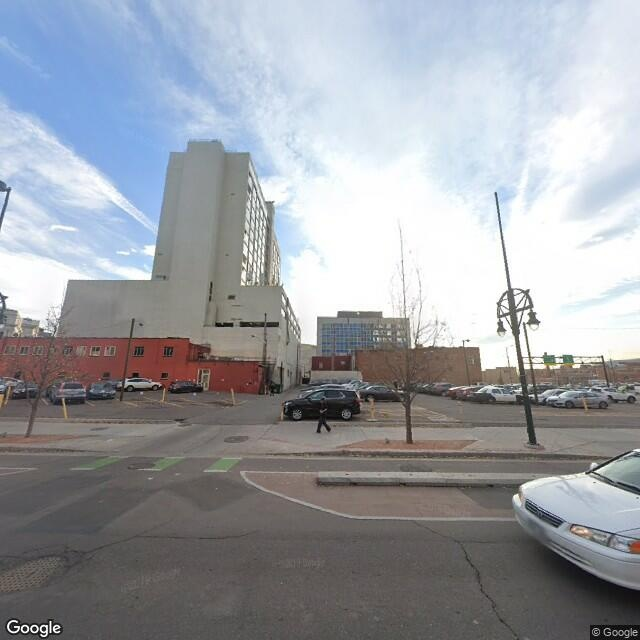

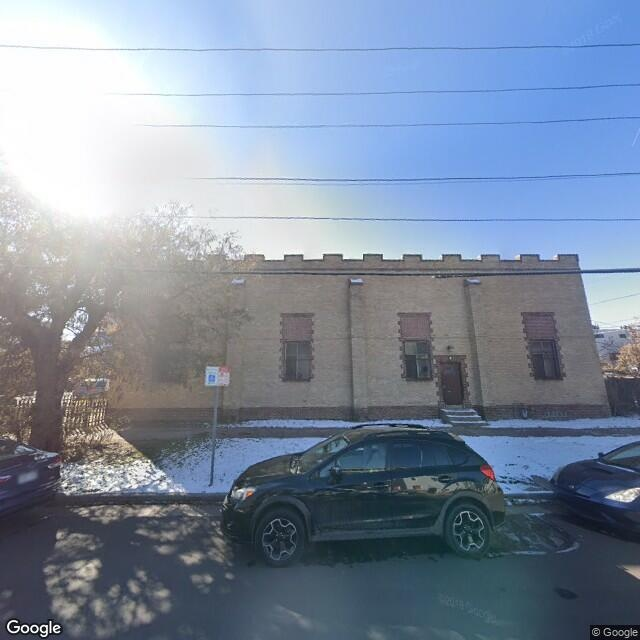

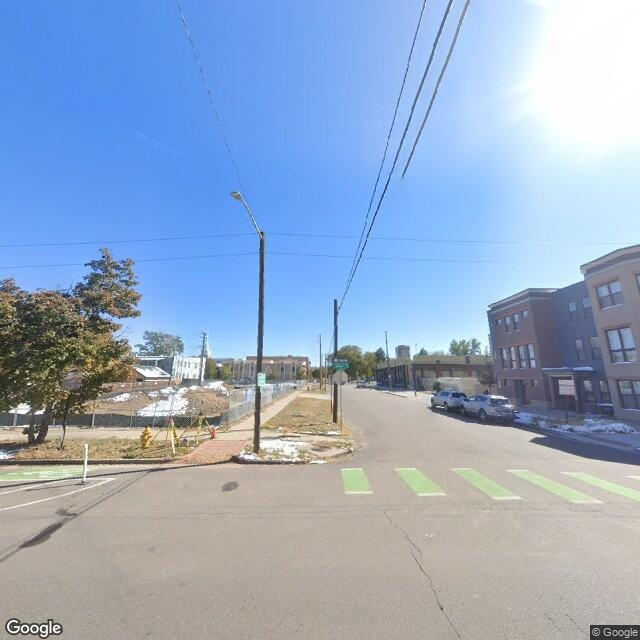

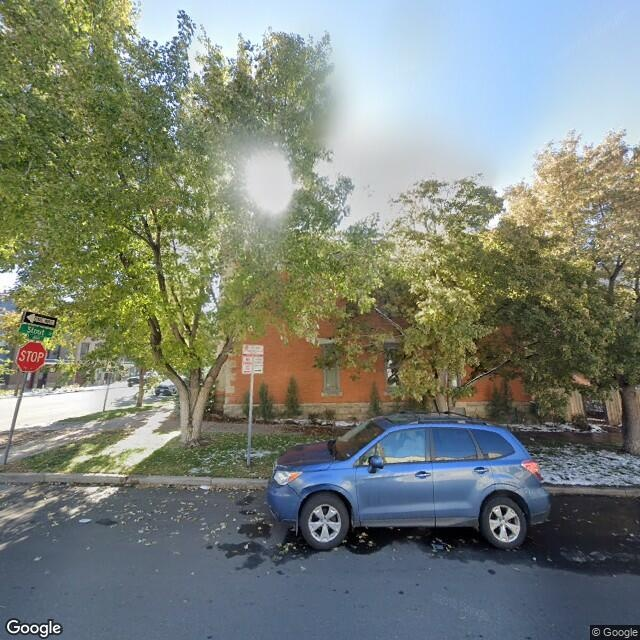

In [ ]:
#display inference on ALL test images
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/inference/output/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

# Export Trained Weights for Future Inference

Now that you have trained your custom detector, you can export the trained weights you have made here for inference on your device elsewhere

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
%cp /content/yolov5/weights/last_yolov5s_results.pt /content/gdrive/My\ Drive

## Congrats!

Hope you enjoyed this!

--Team [Roboflow](https://roboflow.ai)